# Sales Analysis

### Importing Libraries necessary

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt


### 1. merge datasets

In [2]:
#merged files

joined_files = os.path.join("./Sales_Data","Sales_*.csv")

thelist = glob.glob(joined_files)

#the dataset

df = pd.concat(map(pd.read_csv,thelist), ignore_index=True)


In [3]:
#see if everything is correct

df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [4]:
#saving the merged data

df.to_csv("all_data_sales.csv", index=False)

    Cleaning the data

In [5]:
nan_locations = df.isnull()

nan_count = nan_locations.sum()

#displaying how many missing values 
print(nan_count)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [6]:
#getting rid of NaN values
df = df.dropna()

In [7]:
#checking again
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### 2. EDA
#### Best month of sales

    Creating "Month" column

In [8]:
# create a "month" column
df["Month"] = df["Order Date"].str[:2]

In [9]:
#fixing the issue of duplicates
temp_df = df[df['Order Date'].str[:2] == 'Or']

temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


>*For some reason it's giving me 'Or' when I slice the 'Order Date', to fix it. I will update the dataset by the columns that don't include this error*

In [10]:
df = df[df['Order Date'].str[:2] != 'Or']

In [11]:
#reconverting
df["Month"] = df["Month"].astype('int64')

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


    Creating "Sales" column 

In [13]:
#first, we need to convert the columns to their correct data types

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


In [14]:
#creating the column

df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


    Finding the best month for sales 

In [16]:
best_month = df.groupby("Month").sum()
best_month= best_month.iloc[:, -1:]
best_month

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


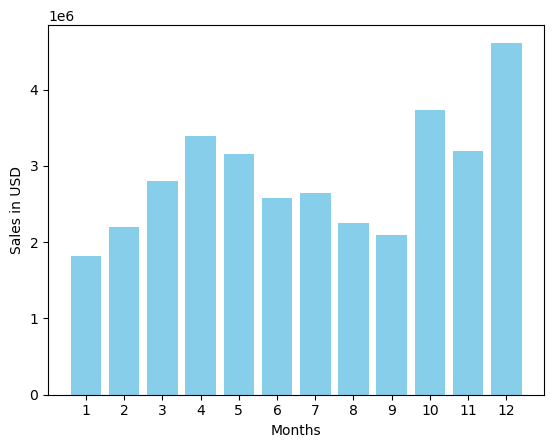

In [17]:
months = range(1,13)
plt.bar(months, best_month['Sales'],color='skyblue')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.show()

#### Finding which US city had the best sales number

    Adding a "City" column

In [18]:
#using apply method to extract the names of the cities
df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


>*There might be a slight issue since we can have duplicates -State wise- so I'm gonna add the states acronynms to differentiate between similar cities* 

In [20]:
#I'm just going to edit the previous line of code to give us 

df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [22]:
city_sales = df.groupby("City").sum()
city_sales = city_sales.iloc[:,-1:]

In [23]:
city_sales

,Sales
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


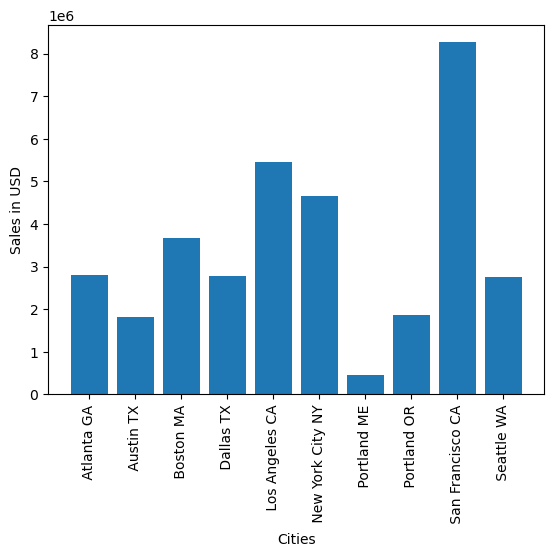

In [24]:
Cities = df["City"].unique()

plt.bar(sorted(Cities), city_sales["Sales"])

plt.xticks(rotation='vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.show()

>*As the bar plot shows, **San Francisco CA** is the city that got the highest number of sales*  

#### When is the best time to display ads to increase the sales?

    Converting dates

In [25]:
hours = pd.to_datetime(df["Order Date"])

hours

C:\Users\nassi\AppData\Local\Temp\ipykernel_12296\455623654.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hours = pd.to_datetime(df["Order Date"])


0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [26]:
df["Hours"] = hours.dt.hour

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [28]:
#let's
new_h = df.iloc[:, -3::2]

new_h.head()

,Sales,Hours
0,23.90,8
2,99.99,22
3,600.00,14
4,11.99,14
5,11.99,9


In [29]:
best_hours = new_h.groupby("Hours").count()

best_hours

,Sales
Hours,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


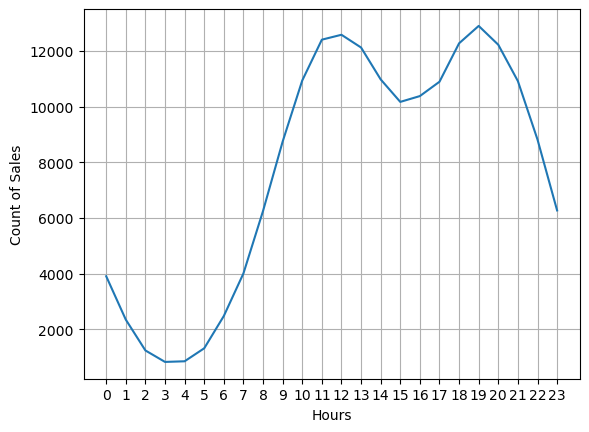

In [30]:
hours_X = sorted(new_h["Hours"].unique())

plt.plot(hours_X, best_hours["Sales"])
plt.xticks(hours_X)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Count of Sales")
plt.show()

>*To answer the question, either between **11:00 am** and **12:00 pm** or around **7:00 pm***

#### What products are most often bought together?

    Creating a "Bought Together" column

In [31]:
new_df = df[df["Order ID"].duplicated(keep=False)]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11


In [32]:
new_df["Bought Together"] = new_df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
new_df.head(20)

C:\Users\nassi\AppData\Local\Temp\ipykernel_12296\1270933590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Bought Together"] = new_df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Bought Together
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
new_df = new_df[["Order ID","Bought Together"]].drop_duplicates()
new_df.head()

,Order ID,Bought Together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df["Bought Together"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

>*We can see that the most common bought together items in this dataset is "Iphone" and "Lightning Charging Cable*

#### What product sold the most?

In [57]:
prod = df.groupby("Product")
qty_order = prod.sum()["Quantity Ordered"]
qty_order

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

([<matplotlib.axis.XTick at 0x21fb24845d0>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

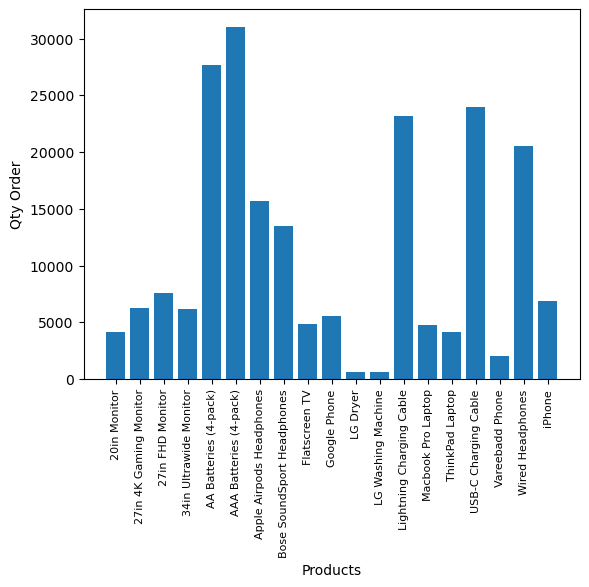

In [67]:
X_prod = sorted(df["Product"].unique())

plt.bar(X_prod, qty_order)
plt.xlabel("Products")
plt.ylabel("Qty Order")
plt.xticks(X_prod, rotation = "vertical", size=8)


>*The most ordered / sold item is **AAA Batteries(4-packs)***

In [69]:
#why is it AAA batteries? because they're cheap... but let's prove this

prices = df.groupby("Product").mean()["Price Each"]


fig, ax1 = plt.subplots()

ax2 = plt.twinx()

ax1.bar(X_prod, qty_order,"g")
ax2.plot(X_prod, prices,"r")

ax1.set_xlabel("Products")
ax2.set_ylabel("Prices")
ax1.set_ylabel("Qty Order")

ax1.set_xticks(X_prod, rotation='vertical')

plt.show

TypeError: Could not convert 04/02/19 04:0004/29/19 14:4004/10/19 08:1704/04/19 18:3304/17/19 10:0004/07/19 10:0004/11/19 13:3104/06/19 16:4004/10/19 07:1904/05/19 07:3704/07/19 09:2404/02/19 12:4004/26/19 14:0604/05/19 14:2404/02/19 21:2604/03/19 21:3304/19/19 11:2504/02/19 18:0304/27/19 18:2004/25/19 11:1304/20/19 19:3904/02/19 12:3304/10/19 15:4504/24/19 00:2704/16/19 09:5004/19/19 14:3404/10/19 13:4704/11/19 06:5304/29/19 13:2204/22/19 08:0504/01/19 10:5204/26/19 19:3904/12/19 13:1404/29/19 10:1604/28/19 18:3204/19/19 13:2104/30/19 21:2404/17/19 02:2004/19/19 14:2204/02/19 23:1204/28/19 22:2004/25/19 08:3204/14/19 12:0404/11/19 19:4704/11/19 08:5504/29/19 19:1604/04/19 21:4004/20/19 10:5504/18/19 13:2104/04/19 12:1304/08/19 13:5404/29/19 19:2204/13/19 22:4104/06/19 12:3704/23/19 23:5904/08/19 12:2704/05/19 16:3704/23/19 19:3704/26/19 08:5604/29/19 22:1804/07/19 15:0904/25/19 08:3504/26/19 07:3504/11/19 10:4104/11/19 15:2704/26/19 22:5404/04/19 21:3204/08/19 17:0604/21/19 23:1604/21/19 08:4104/22/19 09:4104/01/19 15:0804/07/19 13:5104/24/19 14:2604/15/19 08:1104/13/19 17:4704/29/19 07:2304/18/19 17:5404/06/19 18:1904/14/19 01:5504/24/19 14:4304/10/19 15:5404/08/19 17:2604/24/19 12:4304/26/19 17:5304/15/19 19:3404/13/19 17:4904/07/19 12:2704/12/19 11:0304/17/19 19:2704/08/19 18:0204/25/19 22:4004/12/19 10:2304/13/19 11:3004/29/19 18:5404/13/19 12:2504/11/19 15:5804/22/19 20:1404/26/19 15:5104/13/19 11:4204/30/19 22:4004/24/19 21:3404/15/19 11:0204/21/19 12:2204/05/19 09:5204/18/19 12:4304/26/19 20:0404/02/19 06:5304/24/19 09:0904/17/19 15:5004/17/19 22:0804/02/19 15:4104/05/19 04:4804/19/19 09:5404/25/19 15:0904/23/19 09:0404/09/19 21:5204/06/19 14:1204/24/19 07:5004/06/19 10:1904/29/19 20:0104/04/19 14:1404/06/19 11:4804/07/19 15:4604/24/19 20:1904/04/19 04:3604/29/19 21:3904/30/19 13:3504/30/19 17:2504/21/19 14:1604/26/19 07:5904/10/19 11:4004/06/19 10:5604/06/19 06:3204/07/19 11:4604/13/19 16:5704/12/19 10:5404/02/19 21:1504/11/19 09:0404/12/19 12:3104/08/19 15:5304/18/19 17:2004/15/19 17:1504/03/19 21:2204/15/19 17:1904/18/19 07:3204/29/19 14:3304/09/19 21:3004/22/19 14:5604/05/19 20:0504/14/19 11:5004/23/19 05:0004/28/19 09:5804/30/19 16:0904/20/19 06:0404/23/19 20:4704/28/19 17:4604/02/19 10:5804/21/19 12:2404/03/19 12:0904/02/19 18:3004/27/19 20:5104/10/19 02:0804/01/19 19:5904/24/19 08:0904/28/19 14:5604/21/19 17:0104/21/19 12:1404/11/19 17:4504/24/19 17:0004/16/19 20:5304/01/19 14:2804/18/19 10:5204/24/19 23:5804/09/19 17:4304/20/19 19:5504/06/19 13:3204/28/19 23:1804/04/19 23:3904/09/19 12:1504/20/19 17:5704/08/19 08:3404/15/19 13:2604/07/19 17:2004/30/19 08:5804/24/19 17:4804/09/19 22:0504/15/19 00:0204/11/19 23:5704/17/19 13:4104/02/19 19:1604/14/19 08:4404/27/19 03:3304/18/19 11:1604/20/19 22:0104/23/19 14:0704/29/19 13:2604/13/19 08:5204/19/19 18:3904/27/19 14:2304/01/19 14:5504/23/19 20:1304/07/19 12:3804/09/19 12:5204/05/19 11:0204/26/19 12:1204/19/19 19:3304/01/19 19:2804/09/19 18:3904/19/19 10:0504/26/19 21:2004/23/19 10:5204/08/19 10:3504/12/19 20:5204/08/19 19:1704/27/19 10:4004/14/19 19:1004/13/19 19:2604/23/19 07:3004/12/19 08:0104/12/19 00:2204/06/19 14:2104/28/19 10:1204/09/19 12:3604/05/19 15:2204/23/19 22:5804/12/19 10:4204/04/19 12:5304/29/19 23:1104/22/19 12:4904/19/19 10:3604/04/19 09:4504/28/19 11:3104/18/19 11:4104/21/19 18:5304/25/19 02:1604/08/19 13:4504/15/19 19:0104/23/19 16:3104/25/19 12:1204/10/19 21:3304/01/19 23:5204/28/19 11:1504/26/19 14:1804/22/19 14:2504/20/19 16:0204/16/19 21:5404/27/19 17:3904/19/19 17:2404/19/19 17:5104/10/19 15:0704/22/19 11:0904/26/19 21:0204/21/19 11:2304/20/19 17:4004/13/19 14:1504/20/19 20:0404/15/19 16:5804/22/19 19:1204/23/19 08:2904/04/19 21:2204/28/19 14:3104/20/19 20:3004/14/19 19:5504/05/19 11:2804/23/19 17:0704/23/19 13:4404/11/19 19:0504/26/19 16:0704/26/19 18:3204/13/19 05:5904/17/19 22:3104/05/19 14:5705/01/19 00:3104/02/19 18:2504/13/19 11:0704/02/19 08:5504/04/19 13:3804/09/19 23:4204/22/19 15:3304/27/19 09:3504/29/19 10:4604/23/19 21:1404/07/19 22:2604/03/19 08:0504/28/19 22:1804/16/19 20:4104/27/19 10:5504/28/19 13:0005/01/19 02:0604/18/19 21:5304/12/19 13:2904/15/19 22:5604/11/19 21:4104/15/19 20:2204/15/19 20:5804/19/19 20:5304/26/19 20:3704/03/19 20:1804/04/19 07:0004/07/19 15:1904/04/19 21:2004/04/19 13:2304/21/19 22:5304/30/19 00:5304/06/19 00:3404/13/19 04:5504/06/19 22:5604/15/19 13:1404/26/19 20:4104/08/19 18:2604/22/19 16:2704/27/19 21:3504/20/19 22:4104/08/19 18:0604/15/19 10:2004/24/19 18:0004/26/19 12:4904/19/19 13:0304/10/19 12:0904/01/19 13:3504/23/19 12:3804/28/19 10:4604/20/19 21:4404/27/19 07:4804/25/19 21:0504/18/19 09:5204/16/19 12:3304/21/19 13:4904/25/19 19:1904/13/19 20:1804/03/19 13:4704/23/19 21:3304/30/19 13:1504/04/19 18:5804/21/19 01:2304/04/19 20:2104/01/19 05:5804/25/19 16:2504/20/19 15:5604/01/19 17:0704/19/19 17:5204/18/19 10:4204/17/19 19:0104/16/19 12:2704/15/19 14:0804/07/19 12:0104/03/19 14:0304/04/19 13:2404/13/19 08:5204/02/19 07:1304/03/19 19:1504/01/19 19:3604/04/19 12:4404/03/19 16:1204/17/19 22:2904/05/19 20:5704/22/19 07:0904/10/19 11:4804/13/19 09:4104/07/19 11:3304/03/19 11:3504/11/19 07:5604/30/19 07:5004/15/19 19:4904/28/19 13:2604/03/19 06:0104/21/19 17:0704/15/19 01:4104/10/19 19:5804/20/19 18:1804/06/19 15:2604/01/19 17:4604/11/19 12:3904/25/19 10:3804/21/19 12:3704/04/19 22:4504/14/19 22:2004/13/19 20:5704/18/19 08:5504/23/19 18:4704/26/19 13:0804/10/19 18:4304/01/19 07:2104/14/19 15:0604/18/19 12:5904/18/19 12:5904/09/19 13:2104/20/19 14:5804/13/19 12:3808/13/19 07:1608/21/19 21:2808/06/19 12:1908/30/19 13:2908/29/19 16:3908/19/19 23:5208/08/19 19:5408/14/19 06:4708/06/19 19:3108/07/19 15:4308/08/19 16:4408/01/19 09:3508/16/19 21:1108/31/19 13:2208/25/19 21:5608/27/19 14:5808/06/19 22:5908/31/19 12:0708/25/19 12:0508/02/19 17:4908/02/19 18:4308/05/19 05:3508/06/19 09:1608/22/19 11:3508/28/19 22:0708/07/19 11:0108/22/19 06:2108/04/19 22:5908/08/19 01:4908/21/19 14:3608/31/19 14:2708/18/19 19:5108/07/19 20:3008/04/19 10:3008/16/19 19:3408/29/19 22:0008/05/19 13:4008/25/19 06:3608/02/19 19:0408/08/19 12:4908/26/19 18:1008/18/19 22:5608/13/19 16:5508/16/19 12:3508/26/19 06:3808/30/19 17:3708/20/19 19:1908/23/19 12:2908/17/19 12:2308/18/19 18:0408/14/19 15:2808/01/19 12:2808/14/19 21:5808/02/19 11:1708/12/19 22:0608/04/19 14:3008/20/19 18:3708/20/19 18:5208/09/19 14:5008/27/19 20:1008/08/19 16:3408/08/19 13:5108/15/19 15:5608/03/19 12:1308/13/19 15:5708/26/19 23:1008/26/19 14:3808/12/19 15:1308/30/19 02:4508/26/19 22:4608/09/19 06:4908/24/19 15:4308/16/19 09:5508/25/19 16:3508/21/19 00:2408/24/19 21:3908/16/19 20:4708/03/19 12:1208/25/19 13:4908/30/19 19:3808/20/19 15:3608/08/19 15:3108/11/19 12:3008/11/19 01:1908/07/19 14:5808/08/19 10:0908/12/19 08:1408/10/19 21:2908/29/19 12:3908/01/19 13:0508/12/19 18:2108/12/19 16:5408/13/19 19:5208/29/19 12:4808/10/19 20:0508/18/19 16:0208/01/19 13:3008/10/19 11:1308/06/19 17:0908/08/19 16:3508/03/19 18:3308/26/19 19:1408/19/19 17:1608/08/19 16:0308/02/19 19:4208/07/19 17:3108/13/19 23:0408/26/19 00:1108/25/19 09:3608/05/19 11:0708/16/19 08:5708/23/19 18:2708/03/19 22:2108/07/19 14:2408/04/19 15:0908/08/19 20:0308/16/19 17:3508/16/19 22:3208/22/19 17:0508/05/19 20:5708/22/19 23:0808/08/19 18:5108/25/19 15:1308/25/19 16:3008/27/19 12:1908/26/19 16:5508/20/19 20:3708/14/19 17:4008/11/19 20:0508/07/19 17:0608/28/19 15:2608/20/19 12:5608/28/19 17:0808/21/19 11:1108/18/19 22:4408/08/19 09:5708/19/19 14:4108/12/19 22:5508/14/19 15:1008/29/19 14:4008/13/19 23:4008/24/19 19:1408/14/19 15:5708/28/19 08:5608/18/19 14:2208/07/19 22:2008/05/19 15:3808/23/19 21:0708/03/19 11:4908/18/19 17:2708/31/19 17:2908/26/19 21:1408/29/19 14:1808/20/19 09:5608/07/19 13:0708/02/19 15:5208/25/19 16:4908/02/19 17:3208/27/19 07:4308/07/19 17:2908/02/19 11:4308/25/19 17:1008/02/19 11:4708/17/19 21:2408/01/19 13:2608/01/19 22:0408/20/19 20:5708/28/19 16:1408/09/19 23:1908/07/19 21:1808/13/19 20:5408/01/19 21:3808/29/19 09:3908/20/19 16:1108/02/19 18:5208/14/19 11:3808/31/19 09:3808/17/19 19:3908/01/19 18:3808/29/19 21:0508/18/19 22:4008/23/19 19:2208/28/19 13:1708/06/19 08:3708/14/19 11:2608/04/19 12:2708/23/19 15:4408/28/19 17:3408/19/19 12:1708/13/19 11:2108/12/19 16:2008/17/19 16:3908/03/19 15:1408/03/19 11:4408/04/19 13:0308/06/19 20:0708/29/19 13:4008/27/19 09:3708/19/19 14:0608/19/19 20:5208/11/19 13:4708/21/19 10:4909/01/19 01:0008/13/19 21:2708/07/19 08:0708/22/19 20:1508/12/19 13:3208/17/19 16:4608/20/19 13:2908/18/19 20:2808/26/19 21:2408/03/19 22:0708/10/19 16:2008/01/19 18:5408/19/19 14:1108/15/19 13:1708/27/19 16:4608/29/19 08:4708/22/19 13:4408/31/19 18:2208/04/19 00:3208/21/19 23:1908/02/19 13:0708/28/19 20:0008/06/19 22:3908/17/19 23:1708/13/19 08:2208/06/19 07:2808/30/19 12:0908/04/19 18:3808/05/19 12:1108/11/19 18:5108/10/19 15:2208/23/19 18:1708/18/19 17:4808/28/19 19:0108/03/19 19:3208/31/19 22:1108/19/19 20:2208/20/19 02:2708/09/19 19:1008/23/19 11:4008/02/19 09:3708/23/19 13:4108/24/19 20:2308/04/19 18:0408/04/19 08:3708/27/19 19:1508/04/19 18:4308/01/19 12:5808/30/19 11:2508/01/19 22:0508/08/19 15:0408/06/19 12:1308/04/19 13:1008/05/19 09:0308/01/19 07:0008/14/19 06:0208/04/19 11:4312/03/19 23:2812/23/19 10:5912/19/19 06:0712/12/19 17:4312/05/19 20:0212/17/19 10:2812/09/19 11:4412/25/19 16:1512/11/19 11:5212/02/19 20:2112/19/19 19:2512/14/19 11:0412/31/19 09:5812/25/19 11:1012/02/19 23:3412/11/19 14:2112/29/19 00:0412/29/19 22:3012/16/19 10:1512/02/19 19:5812/09/19 10:1912/20/19 12:0812/09/19 10:5712/17/19 14:5712/06/19 06:1312/20/19 15:0612/30/19 06:3812/02/19 19:5612/06/19 10:1812/12/19 20:1612/24/19 07:2712/05/19 10:3012/02/19 19:2912/27/19 17:0712/24/19 14:1412/13/19 14:1112/07/19 15:3012/10/19 17:2212/20/19 17:0112/29/19 09:4612/23/19 17:4512/31/19 15:0612/31/19 11:3912/31/19 18:3912/04/19 21:1012/13/19 23:1812/29/19 18:4012/25/19 09:2212/12/19 23:0512/13/19 08:2712/31/19 11:2912/03/19 09:3412/14/19 21:5112/21/19 10:3712/29/19 23:0112/06/19 08:4512/23/19 11:0812/31/19 03:1412/22/19 09:1912/05/19 11:1412/19/19 14:3412/25/19 14:4312/02/19 15:1912/24/19 08:3212/26/19 12:0412/10/19 14:3212/08/19 19:5212/03/19 13:5412/13/19 23:5112/03/19 11:1112/17/19 19:0512/18/19 13:4512/06/19 07:5712/01/19 08:0612/26/19 15:1812/23/19 23:0412/05/19 19:4712/13/19 18:2612/08/19 18:3512/14/19 22:4012/01/19 20:1312/19/19 19:0012/20/19 12:0912/17/19 11:0512/29/19 16:2912/17/19 17:5912/22/19 19:4612/17/19 09:3312/19/19 09:1312/08/19 18:5212/15/19 18:1712/19/19 19:0212/05/19 18:5112/12/19 14:1112/19/19 22:1712/31/19 16:5512/17/19 07:2412/29/19 07:4112/14/19 14:4912/02/19 17:4712/25/19 22:4812/28/19 15:1512/23/19 09:5112/01/19 19:3912/02/19 13:5312/17/19 11:2712/21/19 06:0412/30/19 06:1212/31/19 13:3512/12/19 21:1912/08/19 17:1112/27/19 16:4712/20/19 00:3212/18/19 12:2112/08/19 13:0612/26/19 23:0512/09/19 15:4912/16/19 14:1112/27/19 23:1612/13/19 17:2912/14/19 20:3312/30/19 19:3612/28/19 22:3601/01/20 00:1412/12/19 12:5312/02/19 10:2212/30/19 19:5012/15/19 23:2112/24/19 02:3612/27/19 13:1312/16/19 16:5912/22/19 11:2712/22/19 22:1212/16/19 07:0912/22/19 16:0312/30/19 16:5612/16/19 18:3712/05/19 15:5112/28/19 18:4612/08/19 18:0512/08/19 21:0112/10/19 09:2912/27/19 19:5212/30/19 19:5312/11/19 11:3412/23/19 22:1912/30/19 21:5612/05/19 12:2112/21/19 15:5112/12/19 10:1512/21/19 00:4012/06/19 19:1212/31/19 20:5112/06/19 16:1012/25/19 08:2912/04/19 19:1012/07/19 13:0812/05/19 20:4212/08/19 13:0612/04/19 11:1712/07/19 10:3712/18/19 13:5112/10/19 10:0012/14/19 19:4412/23/19 15:2112/04/19 07:0812/21/19 09:1912/03/19 17:2112/27/19 22:3112/22/19 09:5312/20/19 16:3112/21/19 22:5612/16/19 10:4112/05/19 15:1912/04/19 15:0512/29/19 21:0412/12/19 17:3212/24/19 12:5012/12/19 10:0312/19/19 17:1212/25/19 18:2312/11/19 20:2712/19/19 19:5112/30/19 17:0012/15/19 20:5812/29/19 00:1712/01/19 15:1312/10/19 20:3612/15/19 16:0912/17/19 07:1312/21/19 17:2812/03/19 10:4512/24/19 18:5212/03/19 09:1812/18/19 12:4312/14/19 20:1312/27/19 10:2312/13/19 06:4112/24/19 11:3412/06/19 01:5112/16/19 17:5512/19/19 00:2212/25/19 12:4612/12/19 22:1612/25/19 12:2112/31/19 12:5712/27/19 18:2912/18/19 20:1812/23/19 22:5212/03/19 19:1812/21/19 17:4212/31/19 19:2012/20/19 11:1612/08/19 05:0112/07/19 17:3012/09/19 22:4512/19/19 17:4012/11/19 18:3512/25/19 20:3012/20/19 23:2112/23/19 20:0912/31/19 13:3112/22/19 20:1912/26/19 22:0912/22/19 18:2812/30/19 17:0412/29/19 14:0612/10/19 06:3412/18/19 18:0512/29/19 00:3412/17/19 05:2712/13/19 19:5212/14/19 16:0012/22/19 02:2612/20/19 17:0712/08/19 20:2512/07/19 15:2012/09/19 12:2812/19/19 10:4212/18/19 12:1212/11/19 16:5412/05/19 21:2712/10/19 10:0612/28/19 23:2212/09/19 08:4812/26/19 15:5212/25/19 15:4012/07/19 12:0512/11/19 15:3012/09/19 13:1812/09/19 14:3912/24/19 20:4612/04/19 12:2512/02/19 18:5312/25/19 17:4012/26/19 01:3212/11/19 13:4612/28/19 09:2512/28/19 16:2312/18/19 19:1512/25/19 18:4612/03/19 22:2712/22/19 21:0212/06/19 15:4112/28/19 15:0312/06/19 08:0812/16/19 12:4212/29/19 11:2012/30/19 23:1212/13/19 14:1612/28/19 22:5212/21/19 09:5112/02/19 20:1512/28/19 11:0412/20/19 20:4912/15/19 21:1412/27/19 14:4012/28/19 22:5712/04/19 17:2512/06/19 11:0212/26/19 03:3312/01/19 16:0312/05/19 22:4912/28/19 20:3012/05/19 19:0712/27/19 17:1112/06/19 16:2612/30/19 11:5212/07/19 22:5112/13/19 19:3712/17/19 15:0112/11/19 18:5612/04/19 19:5312/31/19 21:0012/24/19 20:2012/18/19 12:1712/19/19 20:5312/05/19 14:3412/24/19 13:4112/05/19 15:4412/24/19 17:2412/13/19 08:1812/26/19 14:2012/18/19 00:3312/20/19 18:5712/28/19 17:1412/28/19 06:3512/29/19 18:1612/21/19 13:4712/20/19 17:5512/05/19 12:3612/13/19 10:0012/10/19 10:1412/26/19 12:1812/19/19 11:5912/21/19 18:0612/09/19 19:0112/09/19 21:2812/30/19 18:0012/25/19 09:4812/01/19 20:5512/15/19 19:3712/22/19 20:3012/11/19 15:1512/18/19 17:4912/30/19 12:0812/02/19 11:5312/20/19 21:5012/01/19 18:1912/28/19 13:5912/02/19 12:3412/12/19 02:5112/25/19 23:0112/11/19 10:5312/06/19 13:3212/27/19 10:4712/25/19 17:1012/12/19 17:0512/27/19 13:3212/13/19 15:0512/24/19 23:5912/04/19 10:4612/10/19 11:1912/19/19 11:1412/28/19 15:1212/28/19 15:3612/08/19 13:4712/19/19 12:0512/17/19 20:3912/18/19 10:5712/22/19 13:0512/27/19 07:1912/20/19 14:5712/17/19 15:5512/06/19 21:5812/27/19 12:4312/24/19 14:4712/28/19 17:0812/14/19 22:2512/16/19 15:3312/19/19 16:5712/14/19 19:5112/31/19 19:4012/14/19 11:3612/20/19 21:4212/28/19 09:2412/11/19 12:3212/16/19 15:2912/14/19 22:5112/30/19 17:4912/10/19 10:3912/12/19 22:0812/01/19 12:0012/02/19 15:5212/31/19 18:2212/28/19 17:4412/30/19 07:0012/29/19 15:0312/09/19 15:1612/31/19 16:5412/11/19 13:2412/12/19 12:3412/04/19 19:0712/31/19 18:4612/08/19 12:5912/12/19 11:3212/19/19 15:3912/23/19 22:1112/13/19 04:2912/16/19 22:4312/18/19 23:0812/16/19 15:4512/09/19 17:1912/31/19 15:3712/24/19 11:1412/25/19 14:1312/14/19 23:4012/21/19 19:2512/10/19 11:0612/21/19 19:3112/02/19 16:1712/22/19 11:4512/16/19 11:3712/25/19 14:0412/20/19 12:5112/05/19 03:3412/11/19 20:0112/09/19 10:0712/25/19 05:4212/04/19 22:5312/16/19 16:2012/31/19 22:4812/06/19 21:0812/10/19 09:5512/03/19 15:5712/21/19 12:1612/01/19 13:4212/16/19 00:5212/29/19 17:4412/21/19 18:5212/09/19 13:1312/17/19 10:2912/10/19 07:0212/25/19 17:1212/15/19 16:0412/02/19 00:0912/31/19 02:5112/06/19 16:4912/04/19 18:5012/23/19 19:1212/05/19 13:2312/21/19 20:3912/29/19 01:4812/13/19 11:0812/01/19 13:2412/13/19 11:1312/27/19 22:0112/29/19 23:0712/12/19 14:2612/14/19 11:5612/20/19 01:0312/04/19 08:2912/15/19 20:3012/13/19 08:1112/12/19 15:4012/15/19 14:0112/17/19 22:2012/05/19 13:2112/09/19 12:4212/01/19 13:3312/26/19 09:0412/28/19 22:3412/20/19 00:1012/10/19 19:5312/05/19 12:0812/11/19 13:2912/16/19 15:2212/11/19 11:0012/02/19 13:5612/26/19 10:5012/24/19 10:0912/25/19 18:5312/27/19 09:5312/22/19 14:1512/05/19 15:1012/17/19 14:0712/20/19 12:3712/25/19 00:5312/16/19 19:4012/04/19 17:2912/16/19 23:4712/28/19 13:2012/23/19 17:4612/19/19 12:4312/07/19 08:0812/11/19 00:0612/21/19 14:3012/23/19 17:1512/17/19 10:2812/23/19 18:0712/10/19 17:4112/06/19 10:0812/22/19 15:4412/25/19 20:0012/22/19 01:2512/30/19 16:1112/27/19 17:5212/22/19 21:0212/21/19 08:3612/10/19 16:2212/07/19 23:3512/06/19 15:4212/15/19 22:0212/12/19 09:5812/15/19 23:0112/20/19 10:3512/18/19 08:0712/23/19 13:3612/23/19 10:2112/28/19 19:0712/10/19 23:0912/23/19 19:1712/08/19 13:1612/07/19 11:1112/17/19 16:1912/31/19 22:1512/10/19 11:4412/25/19 12:2812/25/19 16:3512/05/19 09:2412/29/19 16:4812/19/19 18:4012/28/19 23:5612/13/19 06:2612/27/19 15:2912/13/19 19:0512/24/19 19:5312/21/19 21:4512/30/19 16:1812/18/19 14:1312/15/19 10:0512/08/19 14:5812/07/19 17:0812/21/19 05:0312/20/19 18:2912/06/19 14:2112/29/19 02:3012/03/19 13:4812/16/19 16:2412/31/19 13:2712/31/19 19:5112/12/19 10:1712/05/19 18:3312/11/19 07:2512/03/19 13:3212/21/19 19:2512/27/19 13:1312/24/19 23:5912/09/19 11:3112/30/19 21:1412/20/19 19:4312/21/19 10:5912/30/19 21:1312/09/19 12:5012/19/19 10:3112/04/19 20:5912/12/19 17:2312/20/19 22:4712/27/19 07:2912/18/19 15:2512/08/19 13:1612/28/19 12:3512/30/19 17:1712/24/19 16:3601/01/20 00:4512/09/19 21:3812/26/19 15:0612/02/19 19:0312/12/19 20:1712/05/19 02:0312/29/19 13:4212/20/19 10:5312/16/19 13:2312/13/19 19:0512/29/19 21:1612/21/19 22:2112/29/19 18:2512/25/19 11:3102/12/19 00:0002/25/19 09:3802/19/19 12:0802/26/19 14:1202/20/19 16:3402/26/19 00:4302/05/19 07:5602/11/19 22:4202/13/19 20:2102/07/19 22:4102/20/19 13:2902/01/19 22:2702/09/19 15:2702/24/19 11:2202/18/19 08:4302/20/19 15:2602/13/19 14:1002/21/19 21:3802/18/19 22:4002/12/19 13:5702/28/19 15:2902/26/19 21:1202/02/19 22:0702/08/19 00:3402/08/19 17:4502/01/19 18:3902/04/19 21:2402/14/19 14:2002/11/19 22:3302/15/19 13:0002/16/19 17:3902/04/19 09:4702/18/19 11:5702/06/19 12:3002/26/19 20:4002/16/19 12:1302/25/19 12:2702/07/19 23:2402/22/19 15:0802/01/19 20:3702/02/19 12:1902/13/19 22:4302/02/19 15:2602/24/19 18:5802/04/19 00:5202/22/19 16:1702/27/19 20:1502/15/19 13:1402/24/19 18:5502/02/19 14:1302/25/19 20:4802/14/19 19:2102/13/19 16:3102/19/19 07:2402/01/19 11:3102/15/19 16:0102/12/19 09:2102/26/19 14:4702/21/19 17:2402/05/19 16:0402/09/19 19:3602/17/19 23:5602/09/19 20:4202/24/19 17:3702/13/19 18:3702/12/19 14:4102/21/19 07:4002/05/19 14:4802/01/19 13:3902/18/19 19:1702/09/19 09:5302/17/19 15:2902/19/19 03:3102/12/19 21:4302/21/19 20:0802/21/19 11:0402/15/19 09:5802/26/19 12:2602/05/19 07:5402/11/19 09:5302/22/19 12:4902/05/19 10:5402/21/19 16:0402/21/19 19:0002/19/19 02:4802/07/19 17:2602/05/19 19:1902/22/19 17:1302/08/19 12:2702/15/19 13:0702/17/19 21:5502/07/19 10:3202/18/19 12:2802/01/19 20:0802/01/19 14:3502/07/19 16:5902/21/19 11:2802/14/19 00:3002/06/19 12:4602/18/19 23:3002/02/19 05:4702/22/19 20:5002/18/19 23:2202/09/19 14:4202/28/19 12:5602/09/19 14:5502/21/19 23:2402/25/19 16:1602/04/19 21:2402/27/19 17:1202/28/19 21:2902/27/19 15:4002/18/19 21:1402/14/19 19:5302/05/19 10:4302/01/19 11:4602/25/19 16:1502/07/19 12:3902/07/19 07:2402/17/19 18:2502/19/19 10:1502/15/19 09:3102/04/19 19:5602/25/19 22:1402/04/19 12:3302/02/19 16:3402/09/19 21:0302/17/19 11:3502/27/19 11:0902/11/19 07:3302/22/19 14:2602/02/19 08:0202/25/19 12:4602/23/19 17:0402/07/19 21:0902/14/19 12:3402/27/19 12:1902/07/19 18:5502/10/19 18:1702/27/19 12:3002/10/19 15:5302/03/19 05:5602/24/19 11:4102/16/19 09:5502/05/19 01:4902/12/19 14:0402/17/19 13:1902/12/19 12:4002/19/19 15:5702/27/19 08:2202/14/19 20:5902/10/19 11:4502/28/19 21:3102/07/19 23:3702/06/19 13:5102/06/19 15:1402/25/19 23:5102/11/19 23:5602/12/19 22:0302/27/19 22:3102/14/19 16:4802/24/19 05:5802/15/19 15:0702/16/19 19:5402/02/19 18:3102/25/19 14:1102/18/19 08:2502/11/19 19:0502/27/19 22:5302/15/19 13:5902/03/19 01:2502/09/19 20:0202/11/19 12:3902/25/19 11:5702/27/19 20:5402/08/19 10:4402/02/19 19:4702/11/19 15:5302/23/19 09:1302/26/19 10:0202/04/19 00:3802/15/19 10:2802/07/19 20:4102/19/19 22:5002/28/19 00:5302/28/19 06:2802/19/19 13:5902/19/19 10:2702/14/19 12:2802/03/19 17:1102/06/19 12:0902/17/19 21:3602/15/19 13:4402/11/19 19:3002/14/19 17:5702/21/19 21:3102/17/19 12:2402/17/19 11:5802/09/19 11:0502/17/19 19:4302/27/19 19:0102/22/19 17:3102/04/19 13:4102/05/19 11:3202/07/19 13:0002/27/19 15:0202/01/19 09:3202/16/19 10:2302/14/19 19:2302/21/19 17:1402/27/19 21:1202/17/19 11:4902/14/19 22:0402/05/19 07:3402/24/19 18:4102/01/19 08:2602/12/19 12:0802/17/19 17:1902/17/19 23:1002/26/19 11:5902/03/19 16:2502/08/19 09:5902/14/19 17:5402/14/19 19:4302/14/19 08:2502/18/19 09:2402/20/19 16:5802/27/19 22:3302/13/19 15:2402/10/19 17:3802/15/19 17:5902/26/19 00:3302/11/19 20:2302/05/19 12:3602/12/19 21:1302/02/19 16:4502/04/19 17:1802/06/19 10:2002/15/19 12:4702/04/19 19:2202/24/19 16:3102/28/19 09:2102/24/19 00:3902/09/19 12:4302/20/19 12:2701/28/19 11:1701/18/19 09:2301/22/19 02:3901/12/19 13:2801/30/19 11:1201/01/19 14:3601/23/19 22:3001/18/19 07:4801/08/19 15:3201/18/19 21:3301/03/19 12:5501/25/19 11:1301/23/19 22:0901/18/19 14:2101/27/19 10:5001/31/19 18:0401/02/19 22:1001/29/19 20:0201/08/19 12:3901/01/19 13:5101/30/19 20:3901/08/19 15:4101/05/19 10:3301/28/19 14:3201/24/19 16:4801/13/19 16:0701/25/19 09:4001/21/19 20:3901/25/19 11:5801/12/19 20:0501/29/19 06:2501/02/19 23:1601/16/19 20:0901/26/19 23:0901/11/19 01:4901/24/19 06:2001/30/19 21:2701/31/19 11:4401/12/19 08:4001/22/19 19:1901/29/19 09:2001/07/19 07:4201/26/19 14:1401/11/19 12:5401/26/19 08:5001/04/19 11:3701/28/19 16:4101/24/19 07:3301/25/19 22:2101/21/19 10:3501/16/19 13:2901/20/19 20:1801/05/19 12:2001/09/19 13:3201/06/19 21:4801/21/19 00:1401/30/19 20:0001/22/19 14:5701/18/19 00:0101/22/19 16:3901/21/19 09:1901/09/19 20:5501/20/19 18:3901/04/19 22:0501/16/19 18:4101/11/19 11:3501/19/19 21:3701/29/19 12:2601/11/19 16:1001/30/19 16:1701/23/19 09:5501/07/19 19:1301/09/19 10:1001/15/19 20:4201/18/19 10:3401/17/19 07:1001/23/19 15:5701/10/19 17:1601/23/19 17:1601/13/19 00:3701/26/19 20:1201/07/19 17:5201/13/19 12:1401/27/19 20:0301/09/19 12:3801/06/19 20:1201/25/19 16:5201/02/19 15:2501/01/19 14:2901/22/19 19:0501/26/19 06:4401/09/19 15:5101/04/19 22:4601/13/19 17:0401/15/19 12:0401/28/19 22:5601/05/19 07:3701/26/19 08:5001/06/19 13:2601/26/19 15:0701/26/19 23:0801/10/19 22:5901/23/19 18:3001/23/19 14:0301/02/19 20:3101/25/19 11:0101/27/19 10:5701/18/19 18:5901/23/19 10:0001/07/19 13:3901/28/19 19:4801/17/19 08:5201/25/19 20:1901/02/19 21:4201/18/19 19:2801/23/19 11:5601/25/19 15:0501/22/19 08:0901/26/19 16:5401/25/19 16:5501/20/19 14:2001/18/19 23:0901/09/19 13:4001/24/19 12:2301/31/19 19:2201/27/19 20:1801/09/19 21:0601/27/19 19:4601/18/19 10:3001/17/19 23:0501/20/19 11:2701/18/19 09:1501/14/19 19:4501/11/19 12:3801/04/19 21:3601/04/19 11:2601/23/19 19:0801/03/19 21:4901/03/19 11:4001/22/19 13:2401/11/19 10:4201/28/19 05:2601/13/19 15:1401/06/19 20:5301/17/19 19:1301/04/19 19:2801/28/19 20:5201/12/19 12:4701/26/19 13:5501/24/19 13:5801/07/19 08:5101/09/19 21:2401/03/19 09:0601/11/19 21:0801/04/19 14:4201/09/19 19:2801/11/19 16:2201/25/19 18:3801/20/19 17:3901/05/19 14:3801/11/19 16:2501/24/19 17:0501/23/19 18:4201/14/19 11:0001/06/19 14:5201/22/19 12:5001/09/19 18:1901/02/19 12:1201/13/19 15:3101/21/19 09:2501/27/19 15:0301/10/19 23:1801/07/19 00:0401/16/19 19:0601/18/19 16:1401/13/19 14:1401/03/19 19:0901/30/19 13:2701/15/19 21:5601/21/19 22:0401/21/19 08:2301/23/19 09:2901/09/19 21:5001/21/19 18:1801/03/19 08:1501/30/19 22:5201/10/19 16:0201/16/19 18:0601/05/19 08:1601/15/19 15:0401/22/19 14:4701/15/19 20:2601/10/19 12:1401/02/19 15:0801/25/19 07:2801/13/19 06:1201/11/19 15:5601/29/19 10:3201/07/19 21:3401/06/19 18:1001/27/19 12:5001/24/19 17:1501/01/19 12:5001/10/19 06:2701/18/19 19:4201/10/19 13:5001/02/19 01:0701/28/19 10:0501/02/19 13:2001/16/19 13:5101/24/19 13:3501/14/19 20:0201/26/19 19:0907/14/19 22:1907/14/19 11:5807/08/19 07:2907/28/19 12:5207/06/19 16:4407/14/19 16:2107/02/19 01:2407/18/19 21:2407/23/19 10:0507/01/19 23:3907/27/19 17:3307/31/19 17:2707/21/19 16:2207/05/19 12:4607/09/19 17:1007/17/19 09:0307/17/19 06:1907/13/19 15:1707/23/19 15:0407/13/19 18:5607/05/19 12:5507/08/19 09:5307/05/19 10:1007/30/19 18:3107/19/19 09:1307/13/19 14:2507/06/19 16:4807/07/19 22:4807/29/19 09:4707/20/19 12:0807/24/19 10:3507/20/19 14:3807/18/19 12:3107/16/19 15:3307/24/19 21:1807/22/19 00:0207/06/19 23:3207/04/19 21:2507/15/19 10:2607/15/19 20:1407/14/19 20:5407/01/19 20:3807/01/19 12:0807/20/19 18:1307/26/19 17:5007/12/19 09:4007/20/19 09:2807/18/19 00:0707/14/19 15:2407/06/19 05:3607/06/19 11:3107/04/19 11:2107/01/19 06:0807/17/19 09:3507/01/19 08:5907/18/19 22:2407/19/19 09:3707/21/19 11:2607/21/19 13:4707/09/19 11:3307/30/19 14:2107/07/19 10:4207/06/19 19:5907/11/19 11:4407/30/19 15:3907/18/19 12:1307/27/19 21:5507/26/19 16:2807/08/19 09:3007/22/19 13:2107/18/19 13:0907/01/19 20:1807/23/19 11:5907/13/19 17:1807/20/19 13:4007/22/19 06:5607/11/19 21:0807/05/19 17:5307/09/19 09:3907/16/19 21:2807/12/19 18:5907/12/19 13:4107/21/19 11:4507/20/19 09:5407/23/19 11:1107/28/19 22:1807/11/19 19:0807/19/19 18:3007/03/19 03:2107/08/19 14:2407/09/19 22:0607/23/19 12:0707/24/19 20:4507/18/19 00:2707/31/19 01:1307/21/19 17:0807/02/19 18:0607/30/19 06:5707/15/19 12:0407/13/19 16:0207/22/19 13:3307/17/19 07:0707/12/19 17:2207/26/19 22:2007/17/19 23:3607/10/19 23:3307/25/19 14:1207/08/19 20:3207/31/19 12:3607/09/19 09:2707/01/19 16:4507/09/19 11:2707/10/19 16:4407/10/19 07:5307/21/19 14:3507/07/19 17:4207/09/19 05:5607/05/19 15:3807/30/19 18:2107/01/19 15:4007/02/19 18:2207/18/19 19:4907/11/19 20:0807/13/19 17:0107/03/19 18:1907/06/19 12:0607/07/19 13:1407/26/19 21:2807/24/19 18:0107/10/19 08:5907/09/19 22:0607/11/19 20:5907/19/19 13:0107/29/19 00:2107/13/19 13:0907/27/19 07:3407/19/19 18:1207/05/19 18:1607/11/19 12:0207/13/19 10:0107/05/19 15:5907/02/19 23:1807/26/19 20:4407/06/19 09:4807/03/19 20:5507/04/19 16:5107/20/19 12:2607/15/19 21:1907/06/19 17:1707/15/19 08:3307/31/19 02:1707/11/19 16:0107/14/19 12:4107/18/19 16:1407/01/19 14:5907/20/19 20:4307/19/19 08:4107/22/19 15:0707/11/19 19:5907/22/19 11:4607/02/19 14:2307/29/19 19:2207/25/19 15:0307/26/19 00:2307/30/19 09:2207/15/19 10:3607/23/19 12:5707/29/19 12:1007/10/19 15:5107/10/19 19:3007/26/19 16:3807/15/19 07:2307/05/19 21:4307/26/19 19:3207/30/19 09:4507/09/19 22:3707/10/19 17:5007/18/19 22:4107/20/19 14:3807/18/19 13:3007/18/19 12:4807/19/19 11:4607/19/19 08:3307/29/19 20:1507/28/19 08:2107/18/19 19:1407/05/19 20:3907/04/19 18:3307/04/19 21:3607/01/19 14:1807/06/19 17:3807/02/19 12:5007/07/19 21:4807/31/19 11:0007/22/19 10:0607/31/19 19:3107/04/19 08:1807/28/19 20:2307/11/19 06:2407/27/19 12:5507/01/19 16:5407/17/19 22:1407/13/19 12:1307/14/19 09:1507/12/19 07:5107/15/19 03:5407/23/19 19:4007/14/19 11:2407/17/19 00:1207/11/19 21:4107/25/19 20:2207/06/19 23:5307/13/19 01:3607/24/19 16:4307/05/19 09:4407/03/19 22:5207/29/19 12:5707/12/19 07:5807/16/19 14:2707/25/19 22:3607/02/19 09:5407/06/19 18:2907/10/19 12:5907/31/19 02:2307/28/19 18:5907/01/19 18:5107/17/19 13:2307/26/19 06:5107/05/19 21:2607/18/19 15:5307/23/19 14:1607/02/19 11:5707/07/19 21:4607/02/19 00:5207/12/19 16:2307/14/19 13:5107/27/19 00:0307/21/19 15:1407/12/19 19:1607/26/19 21:2807/30/19 01:5107/26/19 11:3907/27/19 20:3507/23/19 12:1007/07/19 01:5607/07/19 10:1407/16/19 14:5607/16/19 12:4807/08/19 10:5507/15/19 19:0207/19/19 22:4607/09/19 11:3607/15/19 20:0907/19/19 18:2807/15/19 17:4907/20/19 12:1807/28/19 14:0107/18/19 16:2207/25/19 18:1107/15/19 07:3307/12/19 21:1007/07/19 13:2007/26/19 19:1507/11/19 21:2807/01/19 18:1007/12/19 10:3307/06/19 10:0007/16/19 11:1707/21/19 12:2007/19/19 04:1407/18/19 21:1407/22/19 05:3207/14/19 21:2407/06/19 19:3407/23/19 17:4807/03/19 13:5007/10/19 01:2707/08/19 08:4707/14/19 10:1707/06/19 13:4707/03/19 23:2007/08/19 18:5907/16/19 11:5607/14/19 12:1007/11/19 19:1307/29/19 18:3707/15/19 09:1607/30/19 21:0007/01/19 19:0107/06/19 02:3007/10/19 18:0607/18/19 21:0507/01/19 20:4307/24/19 19:3507/15/19 19:5107/12/19 06:5307/10/19 07:5507/30/19 13:4607/18/19 14:4707/29/19 20:0407/18/19 10:5707/18/19 23:1807/29/19 08:2807/23/19 12:4907/02/19 20:2707/15/19 21:1707/06/19 13:5007/03/19 07:4307/21/19 21:4707/23/19 18:3207/07/19 18:3007/05/19 22:4407/11/19 19:4807/06/19 12:1107/12/19 10:1407/02/19 21:2707/30/19 15:4007/28/19 10:5007/28/19 14:1507/26/19 11:0707/31/19 03:5707/04/19 18:2507/30/19 22:2707/31/19 20:1106/26/19 17:4806/24/19 14:0006/23/19 16:4906/02/19 16:5906/21/19 18:5106/28/19 22:2006/16/19 07:2406/29/19 02:0706/16/19 16:5806/11/19 11:2706/19/19 19:0906/16/19 17:0406/09/19 21:1706/05/19 19:2706/30/19 19:2206/23/19 10:5606/02/19 18:4906/18/19 20:1406/28/19 12:5906/26/19 08:2806/16/19 12:5206/27/19 22:0106/01/19 19:1206/03/19 11:3306/30/19 21:5006/03/19 21:4606/26/19 19:0706/25/19 23:1906/06/19 10:3806/30/19 18:3106/11/19 06:1106/29/19 19:1506/17/19 17:5006/14/19 14:3206/24/19 14:1506/01/19 13:1806/20/19 08:5006/21/19 11:3606/08/19 20:2506/02/19 14:3506/25/19 12:4206/09/19 02:0506/01/19 23:4806/21/19 20:5706/27/19 21:1006/26/19 18:4906/13/19 18:5706/10/19 23:5906/10/19 11:1306/16/19 21:4206/18/19 16:0706/01/19 15:1006/07/19 13:5606/01/19 22:3406/28/19 19:4906/09/19 20:3406/29/19 09:4106/21/19 11:0206/22/19 09:3906/05/19 17:2806/26/19 12:2806/13/19 12:4806/28/19 13:5506/07/19 10:1506/28/19 09:5806/21/19 21:4206/29/19 20:0106/05/19 19:1706/03/19 13:5806/07/19 18:1206/12/19 08:2606/07/19 12:1206/07/19 09:1806/29/19 13:3306/21/19 16:1706/25/19 23:2706/27/19 00:3106/03/19 19:1506/17/19 08:4606/07/19 14:3306/25/19 14:5706/28/19 14:0806/24/19 02:2606/19/19 20:0406/16/19 09:5006/09/19 17:5506/25/19 07:3106/23/19 17:1206/19/19 20:5706/01/19 13:3806/07/19 11:0306/30/19 15:5906/19/19 13:3706/12/19 14:5106/08/19 18:1406/15/19 06:1706/17/19 13:0906/18/19 12:3306/04/19 21:1206/20/19 10:0906/10/19 10:4306/09/19 12:4106/01/19 17:1406/30/19 15:0306/04/19 20:0006/18/19 20:5006/20/19 17:0106/17/19 19:4006/06/19 14:4106/13/19 14:2306/03/19 09:1106/17/19 10:4806/10/19 06:0006/28/19 18:3006/12/19 07:4006/29/19 10:4106/06/19 23:0406/27/19 23:5906/28/19 20:5406/21/19 00:4806/23/19 10:2906/15/19 11:3606/23/19 19:2406/01/19 11:0606/26/19 08:2006/07/19 10:5206/01/19 17:2806/09/19 20:3006/12/19 20:2606/19/19 19:5706/28/19 21:5406/15/19 23:0306/09/19 19:1006/19/19 07:3906/19/19 20:1306/28/19 16:2306/23/19 13:3206/16/19 18:1406/18/19 21:2706/20/19 13:1806/01/19 17:0406/25/19 11:5106/17/19 19:2106/07/19 00:1906/20/19 20:2506/18/19 09:5306/05/19 19:5106/04/19 12:4606/29/19 17:5306/14/19 14:2306/20/19 16:4506/29/19 14:1206/03/19 11:2106/26/19 00:2906/04/19 16:3206/14/19 09:3706/06/19 12:0006/15/19 15:4806/18/19 18:1606/04/19 22:0606/17/19 16:2706/02/19 20:5506/17/19 10:3806/24/19 15:3106/21/19 12:3806/24/19 19:5406/07/19 08:5706/01/19 17:3206/18/19 08:1206/25/19 13:4306/23/19 01:0106/21/19 14:1206/25/19 21:1706/22/19 18:3406/13/19 12:0306/25/19 19:5206/19/19 22:0606/26/19 11:0206/21/19 21:0406/26/19 16:0606/05/19 19:4606/06/19 09:4206/08/19 15:5706/17/19 10:3506/17/19 09:4206/23/19 12:3006/02/19 23:0406/30/19 21:0106/03/19 18:5206/25/19 20:4606/12/19 13:4806/29/19 20:4906/19/19 02:2906/06/19 21:4906/27/19 14:4806/15/19 14:2606/03/19 14:1306/27/19 20:1006/17/19 11:2506/19/19 14:0906/13/19 19:0006/19/19 11:0306/15/19 15:4906/15/19 14:1006/15/19 20:3006/25/19 06:3006/26/19 16:1506/15/19 20:3806/06/19 22:1806/08/19 12:3506/15/19 19:4206/02/19 12:4806/23/19 19:1806/10/19 15:3706/13/19 15:2906/07/19 00:1606/30/19 15:4206/19/19 22:1706/03/19 16:4506/13/19 10:1906/27/19 11:2606/06/19 15:3506/30/19 15:2506/07/19 13:3906/25/19 11:5206/15/19 11:4606/26/19 07:3406/15/19 11:2306/02/19 21:3406/03/19 23:0806/13/19 10:1106/21/19 17:4206/27/19 15:1606/30/19 00:0406/14/19 14:5406/20/19 05:3106/28/19 14:3306/23/19 12:3506/10/19 15:2506/03/19 22:1906/27/19 17:0906/09/19 21:1806/23/19 14:4906/22/19 10:3006/02/19 12:2406/21/19 13:1206/13/19 12:2406/25/19 12:1406/07/19 09:5706/15/19 22:2206/07/19 16:3906/25/19 18:5706/28/19 10:0506/07/19 08:1706/20/19 15:3906/21/19 07:0406/27/19 08:5106/06/19 13:3306/29/19 06:4106/21/19 17:5206/16/19 09:2906/04/19 16:0006/28/19 13:4306/25/19 21:5006/26/19 20:4206/14/19 18:4806/17/19 09:3806/11/19 14:2706/02/19 16:1106/20/19 11:1506/27/19 12:5206/17/19 04:4206/05/19 10:2306/24/19 21:3606/01/19 21:3306/19/19 08:0406/14/19 15:4806/29/19 19:0306/09/19 11:2406/29/19 14:5006/05/19 23:2606/19/19 13:4006/19/19 10:4606/25/19 17:1706/13/19 23:0106/12/19 23:0106/28/19 10:3106/05/19 13:4506/16/19 21:2206/09/19 12:5206/13/19 11:5806/12/19 17:3306/21/19 20:1906/09/19 11:4306/24/19 14:5906/07/19 12:4206/08/19 04:1906/05/19 16:1806/15/19 23:1406/30/19 08:2406/03/19 16:5206/09/19 14:3506/16/19 19:5906/18/19 14:1006/12/19 11:1606/13/19 14:0806/05/19 17:4806/18/19 21:4606/17/19 15:3706/11/19 08:1806/22/19 12:4606/03/19 16:4006/06/19 20:5006/04/19 13:0206/23/19 19:5506/27/19 05:3106/12/19 09:3806/15/19 10:2306/30/19 01:0606/29/19 15:0803/15/19 09:0503/19/19 10:1003/15/19 14:5003/15/19 11:5503/01/19 09:1903/04/19 17:5703/12/19 17:4803/09/19 01:5103/11/19 19:5303/18/19 09:0003/30/19 13:3403/05/19 11:4203/02/19 20:0403/11/19 19:5203/20/19 07:5203/30/19 15:3003/17/19 02:5403/28/19 03:4303/03/19 12:1803/16/19 19:1403/07/19 12:4703/08/19 15:5303/14/19 15:2503/26/19 20:1903/29/19 22:5503/20/19 02:2403/09/19 18:2803/16/19 14:3503/31/19 08:1503/01/19 14:0403/26/19 16:5503/09/19 14:4403/20/19 16:4203/15/19 17:4603/25/19 03:3903/19/19 10:3203/19/19 17:3703/18/19 08:1803/04/19 19:1903/05/19 17:3003/25/19 22:3303/24/19 18:5603/28/19 07:5803/27/19 17:4203/16/19 14:0803/22/19 14:2803/19/19 12:5303/29/19 23:2003/10/19 23:4503/01/19 13:0503/24/19 13:0603/08/19 10:3403/02/19 18:5603/14/19 10:4503/06/19 17:3503/29/19 19:3803/24/19 08:5103/11/19 09:5603/22/19 06:1803/27/19 18:3803/25/19 10:1503/04/19 18:4503/15/19 16:5403/01/19 19:0303/13/19 18:1303/26/19 22:0703/09/19 21:1003/14/19 22:4503/11/19 13:2303/24/19 13:0203/26/19 18:0003/04/19 16:4303/24/19 11:3703/08/19 18:1603/23/19 12:3203/23/19 13:0103/16/19 11:4603/05/19 15:4403/23/19 22:2603/09/19 18:4503/11/19 14:0303/11/19 12:2103/04/19 00:1003/01/19 20:3503/03/19 14:3803/26/19 08:2103/24/19 12:4503/21/19 16:3703/28/19 06:1503/19/19 10:3803/16/19 16:3903/06/19 10:4603/11/19 13:5903/17/19 12:0903/19/19 10:3503/14/19 20:1503/19/19 03:4803/24/19 20:3803/18/19 08:4703/12/19 10:2203/28/19 01:0203/25/19 18:0803/02/19 12:3203/11/19 18:5603/28/19 07:3703/23/19 11:1803/09/19 11:2203/23/19 09:4803/01/19 21:2003/07/19 19:5903/06/19 17:3903/15/19 23:1803/17/19 22:1703/20/19 17:0303/15/19 21:5303/10/19 14:2003/09/19 07:0503/21/19 10:0203/03/19 15:2603/24/19 09:4303/15/19 04:5903/04/19 01:5903/30/19 14:2103/07/19 12:4003/26/19 20:4503/03/19 19:0903/10/19 18:3503/19/19 18:5903/14/19 09:1803/03/19 09:4703/26/19 20:1503/12/19 12:5003/17/19 18:1303/24/19 17:0103/20/19 12:0303/06/19 10:5603/08/19 12:5903/30/19 21:4303/31/19 13:2003/16/19 11:4203/01/19 16:0903/02/19 21:3803/05/19 16:2503/03/19 13:5503/04/19 10:3003/10/19 09:0303/31/19 02:0103/07/19 21:1503/20/19 23:4903/02/19 18:2503/08/19 12:0203/28/19 15:5303/26/19 15:2703/26/19 19:4903/29/19 20:4503/31/19 22:0203/28/19 13:0103/07/19 13:0903/07/19 18:3403/12/19 15:5303/07/19 16:0703/18/19 10:5403/02/19 21:4503/16/19 16:1003/14/19 19:2803/04/19 18:0803/02/19 08:5803/29/19 15:4203/07/19 12:1903/22/19 16:3803/23/19 06:5403/21/19 19:5703/31/19 19:3803/05/19 15:3903/31/19 05:3903/22/19 09:5703/05/19 11:2103/04/19 17:3303/23/19 09:5803/09/19 12:4303/11/19 20:3903/27/19 14:2903/28/19 21:0403/06/19 17:1203/27/19 13:1803/09/19 14:2303/14/19 10:4003/20/19 21:3203/06/19 09:4603/06/19 13:3303/21/19 02:4903/23/19 07:1003/23/19 16:0503/29/19 21:2303/21/19 22:3703/25/19 12:1703/09/19 18:3503/20/19 10:0803/10/19 12:3903/05/19 13:4503/27/19 12:2003/20/19 20:1603/18/19 15:5003/15/19 13:4503/15/19 13:4503/18/19 00:0903/04/19 13:0403/17/19 14:2303/19/19 12:0703/10/19 23:2403/11/19 14:5003/05/19 21:1003/29/19 22:0903/14/19 04:4403/29/19 11:3503/13/19 17:2503/23/19 18:5003/26/19 18:5503/31/19 13:5703/02/19 20:5203/06/19 14:3803/17/19 11:3203/10/19 23:3103/08/19 22:3203/16/19 20:4503/15/19 16:1503/04/19 18:0003/14/19 16:1103/08/19 11:0103/20/19 15:0103/13/19 12:1103/27/19 18:5503/02/19 15:1303/02/19 12:5803/03/19 22:3103/01/19 21:0803/04/19 10:5903/03/19 21:2903/25/19 19:4603/02/19 20:5403/25/19 10:1403/31/19 16:3703/22/19 17:0603/15/19 22:4603/06/19 16:1203/28/19 21:1903/22/19 00:1403/25/19 02:1103/04/19 15:1703/21/19 01:1003/04/19 13:3203/25/19 14:2703/28/19 19:2903/09/19 19:2803/30/19 18:2803/22/19 18:2303/22/19 00:5803/09/19 20:4303/06/19 07:1703/18/19 15:3403/08/19 13:3203/31/19 10:5203/07/19 17:4103/23/19 19:2303/27/19 19:5003/12/19 12:1703/19/19 08:2203/30/19 12:5503/07/19 11:4503/23/19 22:3803/03/19 14:2703/04/19 08:1803/07/19 06:3603/25/19 07:3703/26/19 20:5303/12/19 14:0203/21/19 12:5603/25/19 12:3903/18/19 12:1903/11/19 12:2703/23/19 17:4403/31/19 19:3803/21/19 09:4503/14/19 09:5003/12/19 15:2103/21/19 18:0603/29/19 12:0403/04/19 19:1103/23/19 01:3503/03/19 13:5603/14/19 12:1603/24/19 00:1503/24/19 09:0703/03/19 09:4403/18/19 22:0903/05/19 11:1503/07/19 14:2003/15/19 19:0503/10/19 10:3603/19/19 17:0803/02/19 15:1403/18/19 23:1103/06/19 13:3303/23/19 17:4103/16/19 02:4303/20/19 18:3803/23/19 13:3303/11/19 22:5903/05/19 14:1903/04/19 22:5703/01/19 18:5203/22/19 14:2403/10/19 14:2503/07/19 20:1003/14/19 17:3003/31/19 00:2903/07/19 17:4203/23/19 11:3303/19/19 10:1703/19/19 18:4803/12/19 17:3703/15/19 23:2203/08/19 21:3103/26/19 19:2205/03/19 12:5105/26/19 17:0805/27/19 16:2505/24/19 20:1805/18/19 21:2705/20/19 10:1705/21/19 11:3005/18/19 20:0305/25/19 16:0505/05/19 16:1005/03/19 13:0205/25/19 12:4905/12/19 11:1405/12/19 20:2905/09/19 15:3605/18/19 18:1205/11/19 21:1205/30/19 14:4405/20/19 17:2005/09/19 13:0905/30/19 08:0505/20/19 19:1405/22/19 18:1305/29/19 02:0205/07/19 20:1905/02/19 17:3805/10/19 20:1605/05/19 13:1705/29/19 14:1205/12/19 13:3505/28/19 20:0005/03/19 16:4805/22/19 16:0205/24/19 08:4205/14/19 18:1805/29/19 09:5605/01/19 16:1405/24/19 15:0305/01/19 11:1105/06/19 12:3105/20/19 18:2705/02/19 20:3105/24/19 17:2805/11/19 10:0505/17/19 16:3505/03/19 07:1905/14/19 16:4705/25/19 12:0705/02/19 07:1805/05/19 17:2605/28/19 22:4905/17/19 10:0105/11/19 10:3905/01/19 09:3705/29/19 20:3105/21/19 23:5905/22/19 19:3305/05/19 20:2705/24/19 23:2205/08/19 12:1605/25/19 20:2805/29/19 22:4705/09/19 17:5905/06/19 20:0005/12/19 09:0205/31/19 02:0605/02/19 11:5605/30/19 21:5905/27/19 21:2005/08/19 20:1605/22/19 23:3105/27/19 22:0905/05/19 09:2505/03/19 19:5305/28/19 07:2305/10/19 17:5205/10/19 17:1005/13/19 14:2205/13/19 20:1005/24/19 19:1705/06/19 15:3205/25/19 18:5105/05/19 14:0905/14/19 13:0005/23/19 12:3005/31/19 11:0005/03/19 12:2905/29/19 09:4105/21/19 00:1705/09/19 23:0505/07/19 08:5805/19/19 06:2905/25/19 17:2505/12/19 22:5005/22/19 19:1205/22/19 17:2905/06/19 12:0405/04/19 19:1905/13/19 14:5805/24/19 08:3405/25/19 18:2805/29/19 18:1105/28/19 22:2505/22/19 18:1005/04/19 13:4505/29/19 11:0305/07/19 19:2905/27/19 16:5705/09/19 14:0605/17/19 10:2305/17/19 10:3905/14/19 12:5705/07/19 19:2205/19/19 11:0605/21/19 20:5205/11/19 08:3005/12/19 19:1805/01/19 10:1505/09/19 12:3205/08/19 20:4505/25/19 09:0705/09/19 07:1205/15/19 10:3605/16/19 10:0305/05/19 14:0805/01/19 21:4705/31/19 15:0305/02/19 12:2805/08/19 22:4805/06/19 16:0505/23/19 16:5305/02/19 13:0905/26/19 18:0005/20/19 12:4405/04/19 14:2205/16/19 13:0005/03/19 11:1805/09/19 20:4905/25/19 22:1205/07/19 22:3505/25/19 19:4705/30/19 08:4405/23/19 17:4805/31/19 21:2205/18/19 18:4405/02/19 11:0905/02/19 19:2706/01/19 00:3605/10/19 18:3805/08/19 00:3605/13/19 13:3905/13/19 12:3305/27/19 19:0005/06/19 04:3705/29/19 20:3605/25/19 19:5405/15/19 14:2705/06/19 19:2905/14/19 16:2305/13/19 15:0705/30/19 17:3305/04/19 11:4405/04/19 20:5305/10/19 12:4005/21/19 19:0405/28/19 11:1105/14/19 12:2305/18/19 18:2205/01/19 17:5105/24/19 21:1805/26/19 00:0605/31/19 10:5805/17/19 20:4605/01/19 21:1705/20/19 21:5105/02/19 17:2805/23/19 17:3605/04/19 17:0505/19/19 07:4505/11/19 20:2805/28/19 10:5905/10/19 18:4505/16/19 21:2505/20/19 23:1505/25/19 17:3005/28/19 19:5905/05/19 12:2305/03/19 00:0805/30/19 22:5805/15/19 23:1705/20/19 13:4405/08/19 10:0305/09/19 12:1305/14/19 14:4005/23/19 12:5805/23/19 06:3705/03/19 20:4105/02/19 11:2205/15/19 21:4505/22/19 23:4305/11/19 22:2505/20/19 17:3505/28/19 20:4405/13/19 19:4105/08/19 19:5205/09/19 09:1305/06/19 10:5705/02/19 11:2305/09/19 11:4205/20/19 19:5505/01/19 10:5305/10/19 13:4605/09/19 08:5705/28/19 15:3605/24/19 16:1305/14/19 10:4805/29/19 21:3605/03/19 08:5005/01/19 13:4405/16/19 14:5005/17/19 11:5605/20/19 09:4905/28/19 12:4505/15/19 18:1105/04/19 17:2505/03/19 14:3505/12/19 23:5705/04/19 17:2705/13/19 20:1805/26/19 22:0205/24/19 18:4805/21/19 21:5805/14/19 08:2005/02/19 07:2105/25/19 20:4905/08/19 13:1105/08/19 21:5005/03/19 23:2705/22/19 19:2705/29/19 06:2205/18/19 14:2205/16/19 02:2305/20/19 10:1505/07/19 19:1005/10/19 10:1005/12/19 13:5205/20/19 13:5105/05/19 18:3805/10/19 20:5805/19/19 00:3005/07/19 12:0705/16/19 18:0805/18/19 21:2505/19/19 12:3805/27/19 18:0805/12/19 20:3905/21/19 13:1505/24/19 21:3005/16/19 10:1605/11/19 19:4005/29/19 17:1005/16/19 12:5205/11/19 18:5805/21/19 12:0605/11/19 10:2205/12/19 02:4405/14/19 01:2005/06/19 22:2205/11/19 15:3805/25/19 17:0905/27/19 16:5905/13/19 11:0505/04/19 23:3905/10/19 12:3205/28/19 16:5305/06/19 11:5905/31/19 14:5205/09/19 14:4305/06/19 17:0705/13/19 21:4105/22/19 18:1205/21/19 07:0205/06/19 16:5405/02/19 11:3005/07/19 19:2205/03/19 20:3305/27/19 05:3105/10/19 08:0805/24/19 19:3505/14/19 11:4005/03/19 14:4505/29/19 22:1905/27/19 06:1005/13/19 19:2905/06/19 10:5805/18/19 07:5805/16/19 01:1305/10/19 05:1705/06/19 16:1805/09/19 18:0705/12/19 13:2005/19/19 21:4505/11/19 23:3905/29/19 19:4705/08/19 10:1305/21/19 08:4605/10/19 18:5305/08/19 09:2905/03/19 15:5505/03/19 11:5505/06/19 11:2005/31/19 18:1805/13/19 07:4405/05/19 16:0305/17/19 19:4005/27/19 15:5705/27/19 14:4705/12/19 18:0505/01/19 11:0705/07/19 09:4705/12/19 15:1305/17/19 00:4705/19/19 19:3305/03/19 19:2705/04/19 13:1005/01/19 17:0905/20/19 14:3405/18/19 18:5505/06/19 18:1705/14/19 21:3305/28/19 11:3905/12/19 16:3005/15/19 10:2905/26/19 05:5105/07/19 21:0105/30/19 11:4405/01/19 15:3011/26/19 15:5811/24/19 12:3711/22/19 11:3011/18/19 20:0811/20/19 12:4611/03/19 17:3511/17/19 18:0911/05/19 17:5111/25/19 08:2311/22/19 17:1811/12/19 13:2711/17/19 08:2411/21/19 21:1511/24/19 18:4411/16/19 10:4811/07/19 13:3111/08/19 11:1311/29/19 15:5611/17/19 13:4811/04/19 14:0411/02/19 21:0811/26/19 21:5611/23/19 08:4411/28/19 11:1211/13/19 16:2711/19/19 18:3311/19/19 11:3811/21/19 16:5711/21/19 00:2011/02/19 08:5011/26/19 15:0911/27/19 16:4611/16/19 16:5411/21/19 20:4911/26/19 18:2811/16/19 21:5111/15/19 00:1411/27/19 13:5711/13/19 12:4611/12/19 05:5011/20/19 19:5611/16/19 16:5911/09/19 20:5811/25/19 18:5711/03/19 22:3911/18/19 21:3911/29/19 12:5911/20/19 18:1911/30/19 23:5411/29/19 07:5611/08/19 07:3711/08/19 17:1611/13/19 06:1211/24/19 14:2311/19/19 17:2211/20/19 09:1911/03/19 21:4011/28/19 20:3711/05/19 14:0111/30/19 15:2711/03/19 21:5111/05/19 21:3611/07/19 20:3711/15/19 19:5211/07/19 17:3111/03/19 22:4811/28/19 21:1611/13/19 11:5711/16/19 14:1311/04/19 12:0511/04/19 20:4211/29/19 10:4011/12/19 11:3011/24/19 13:5111/08/19 00:5511/03/19 19:3811/12/19 14:3311/21/19 09:3711/10/19 15:1011/02/19 17:4011/13/19 20:2511/16/19 11:4111/09/19 14:1211/13/19 12:3211/18/19 10:5811/16/19 17:3411/21/19 18:1711/24/19 21:4511/11/19 20:3711/17/19 21:0011/29/19 16:1511/30/19 23:5111/28/19 09:1411/13/19 13:4911/22/19 07:5911/08/19 14:4511/23/19 17:1911/17/19 17:5611/19/19 20:1911/12/19 13:5411/27/19 21:3811/20/19 16:2111/02/19 10:4711/09/19 08:5911/06/19 22:5811/05/19 14:3711/30/19 18:4211/17/19 18:0211/12/19 15:2911/15/19 10:5811/24/19 20:1511/10/19 21:4011/15/19 21:2511/25/19 02:0011/18/19 16:0811/10/19 12:4011/30/19 13:4511/09/19 13:0711/03/19 13:5211/06/19 23:2611/01/19 19:0011/22/19 10:1011/06/19 09:1911/26/19 19:2811/24/19 08:0611/21/19 17:5411/10/19 13:0311/13/19 07:4411/19/19 20:4811/17/19 22:3511/25/19 09:0611/24/19 07:4911/05/19 13:2611/27/19 12:0911/22/19 13:4311/11/19 16:4811/24/19 18:0211/28/19 14:5311/16/19 17:3511/30/19 04:4611/09/19 15:0211/18/19 15:5111/15/19 19:4411/29/19 17:1311/01/19 18:4511/05/19 09:1411/30/19 17:2311/29/19 23:5511/08/19 10:2911/10/19 11:1911/30/19 22:4911/04/19 15:0311/25/19 15:2511/18/19 09:3111/29/19 08:5911/27/19 21:4311/22/19 21:3111/04/19 14:0711/19/19 09:2911/23/19 08:4011/29/19 21:0211/05/19 17:1211/30/19 20:4911/11/19 19:4011/25/19 13:1111/16/19 11:4111/17/19 12:5811/25/19 06:5611/25/19 13:4311/01/19 16:2211/09/19 21:0011/23/19 10:2911/05/19 09:3811/19/19 17:5111/12/19 18:3511/28/19 11:4311/16/19 13:0611/07/19 21:4211/21/19 20:1111/02/19 10:5111/04/19 16:1511/11/19 16:3211/05/19 00:2111/02/19 08:2011/18/19 09:0111/17/19 11:1611/11/19 10:2411/24/19 12:4611/10/19 21:0311/09/19 23:0411/25/19 14:2811/27/19 11:1711/06/19 12:3011/25/19 11:5911/23/19 19:5611/01/19 09:1711/21/19 20:0411/06/19 19:5011/01/19 15:0811/18/19 15:2611/14/19 18:5711/24/19 09:5811/15/19 17:4711/02/19 12:3811/12/19 22:1711/28/19 11:0811/12/19 11:1211/13/19 11:0811/10/19 08:2511/20/19 07:4711/28/19 20:1311/28/19 23:5011/28/19 12:4011/05/19 19:0111/05/19 00:1511/19/19 19:0211/23/19 11:3111/22/19 07:1211/17/19 10:2411/21/19 13:1911/27/19 14:2411/28/19 17:2011/21/19 10:1911/09/19 15:1711/07/19 11:4411/17/19 12:5011/29/19 21:0511/27/19 02:4611/10/19 09:5511/10/19 10:3811/27/19 09:3611/09/19 15:4311/10/19 10:4911/24/19 02:0911/01/19 17:1311/21/19 22:0611/07/19 23:2711/26/19 07:3111/06/19 13:5211/17/19 07:5411/11/19 16:4311/27/19 13:4311/02/19 20:3711/24/19 23:2011/09/19 12:4911/16/19 10:3011/02/19 06:5411/10/19 06:0911/10/19 18:3011/06/19 09:5411/01/19 15:0111/20/19 06:0111/22/19 18:0511/28/19 17:4311/21/19 13:2411/25/19 17:4111/28/19 17:1711/29/19 15:1311/25/19 14:0811/27/19 22:4911/24/19 18:0511/28/19 20:1011/15/19 08:4411/05/19 09:0011/26/19 21:0911/11/19 21:1211/04/19 10:1811/14/19 18:0811/15/19 18:3811/01/19 16:4411/27/19 05:4211/22/19 17:5111/18/19 12:3511/24/19 15:1811/16/19 12:5011/24/19 21:5211/24/19 01:0511/30/19 14:5911/06/19 11:1211/24/19 11:0011/22/19 15:1611/23/19 14:4811/21/19 12:0411/03/19 20:4711/25/19 12:3812/01/19 00:4611/30/19 18:0511/01/19 12:4111/12/19 14:3611/02/19 10:5411/30/19 10:4811/18/19 12:3911/23/19 15:2211/09/19 18:0111/21/19 16:3611/01/19 11:4411/01/19 13:5411/10/19 18:5711/16/19 13:4511/13/19 11:5511/24/19 18:0711/10/19 19:3211/24/19 23:1011/03/19 18:1411/22/19 22:1211/30/19 17:4211/04/19 11:5211/22/19 19:5711/19/19 07:3011/04/19 12:1611/17/19 23:5211/18/19 10:4411/18/19 09:5511/01/19 20:0911/30/19 15:0311/22/19 10:2411/07/19 17:3111/12/19 12:2811/30/19 18:1711/28/19 14:1911/12/19 14:0611/27/19 20:2211/07/19 19:2611/29/19 01:3411/15/19 22:4311/30/19 11:4511/01/19 20:4911/26/19 11:5011/01/19 06:3011/30/19 00:1311/13/19 14:4511/02/19 11:0711/15/19 18:1311/22/19 16:1411/17/19 10:2911/20/19 11:2911/09/19 13:0311/03/19 19:1611/16/19 00:4411/01/19 13:4311/07/19 19:2711/03/19 14:2911/24/19 10:5711/26/19 20:4711/25/19 20:4811/12/19 11:5811/30/19 07:0711/07/19 21:1011/27/19 02:0011/17/19 16:0711/03/19 10:0411/10/19 05:0711/03/19 20:0411/15/19 19:1911/03/19 16:0311/05/19 13:4811/02/19 22:2711/29/19 13:1611/16/19 10:5711/23/19 20:5011/03/19 09:5511/16/19 16:3511/09/19 22:2211/01/19 14:1311/17/19 05:1311/08/19 15:2411/08/19 17:3111/23/19 15:1511/23/19 08:5311/11/19 11:3611/12/19 06:0111/05/19 14:5011/07/19 16:0011/06/19 11:0911/15/19 15:4911/11/19 21:0611/05/19 22:0811/06/19 17:4211/02/19 16:0811/15/19 12:4811/17/19 20:2611/26/19 12:1011/21/19 11:3211/15/19 11:0911/29/19 23:2011/10/19 16:1111/13/19 21:0711/17/19 08:3111/21/19 11:1211/16/19 00:4311/08/19 20:5011/20/19 08:3111/08/19 14:3211/18/19 18:1311/14/19 21:1911/15/19 21:3211/07/19 01:4811/27/19 17:3811/06/19 14:3111/12/19 21:1511/19/19 12:2911/05/19 12:3911/30/19 18:0411/26/19 13:1011/10/19 11:4511/25/19 02:1011/22/19 11:3611/29/19 21:3611/05/19 18:0311/13/19 19:0311/05/19 12:0111/15/19 16:3011/30/19 14:0711/05/19 22:4011/16/19 00:0811/24/19 22:0011/12/19 11:3311/19/19 11:5411/01/19 10:2111/27/19 14:2510/28/19 23:5610/16/19 15:0110/29/19 18:4210/29/19 19:5010/18/19 11:5510/01/19 13:0310/21/19 15:0710/19/19 14:1410/04/19 17:0810/14/19 19:2710/29/19 07:0610/16/19 17:5310/07/19 14:4110/10/19 19:0810/20/19 18:2310/26/19 11:3810/24/19 19:0110/21/19 08:3410/19/19 19:1510/10/19 22:4510/02/19 06:2610/18/19 17:5710/03/19 11:0810/20/19 14:2010/17/19 09:4210/23/19 14:0010/06/19 10:5210/23/19 13:5210/28/19 07:3610/03/19 20:0210/18/19 07:3310/03/19 18:3710/13/19 11:3510/09/19 21:1610/07/19 21:4310/17/19 17:0610/06/19 19:5210/24/19 18:2910/22/19 01:2110/06/19 07:0910/07/19 15:4610/01/19 12:0810/08/19 10:4210/28/19 10:1410/29/19 14:4410/16/19 13:0410/16/19 12:4110/19/19 19:4610/16/19 19:2210/14/19 10:3810/08/19 12:2210/06/19 18:4210/21/19 05:4310/09/19 14:3610/31/19 17:0910/03/19 20:3710/07/19 13:0910/12/19 13:1710/11/19 02:2710/26/19 19:3710/05/19 15:3610/02/19 10:5610/22/19 20:2810/27/19 09:1410/05/19 20:3910/07/19 19:3410/09/19 12:1110/26/19 08:0010/16/19 15:1210/21/19 21:4710/17/19 04:1710/03/19 09:1610/31/19 00:2510/11/19 15:4810/20/19 08:0010/12/19 19:5410/25/19 10:2210/03/19 18:2010/04/19 12:2010/26/19 04:5010/02/19 05:4510/05/19 17:2010/15/19 17:3410/27/19 09:1210/13/19 10:1410/31/19 15:1210/10/19 10:5510/08/19 21:4010/15/19 17:0610/15/19 19:2010/23/19 20:3810/27/19 12:0110/01/19 22:1710/20/19 20:2310/11/19 16:3210/11/19 07:2410/04/19 17:3710/14/19 17:4710/14/19 11:4110/07/19 15:3810/26/19 08:1410/11/19 12:2110/25/19 16:1210/10/19 15:5210/18/19 20:0110/17/19 16:1610/17/19 13:0210/02/19 20:5810/02/19 08:3910/15/19 21:4410/24/19 15:0110/19/19 12:1410/28/19 10:0210/03/19 15:1510/25/19 19:0310/10/19 13:0910/31/19 08:2510/10/19 19:4310/25/19 05:5010/07/19 21:5810/23/19 13:5010/19/19 18:0610/12/19 14:3410/10/19 23:2010/10/19 15:1210/09/19 14:4110/27/19 16:1410/13/19 15:1210/02/19 21:0910/06/19 01:1010/11/19 18:3610/02/19 12:5810/18/19 20:3510/08/19 16:5610/13/19 11:4810/19/19 08:4610/29/19 22:5110/22/19 22:3210/02/19 13:0410/11/19 22:2910/29/19 23:2210/13/19 14:4510/28/19 10:5810/21/19 16:5410/15/19 16:2410/18/19 11:3310/16/19 23:1710/26/19 21:5910/09/19 07:2710/27/19 22:4610/09/19 18:2310/04/19 13:4410/05/19 21:1010/23/19 19:1210/08/19 09:2810/18/19 18:3210/19/19 15:2210/12/19 14:0310/02/19 08:1710/04/19 19:3110/22/19 10:1910/30/19 21:2810/16/19 16:2710/23/19 15:2910/11/19 12:4710/10/19 13:2110/01/19 14:0510/01/19 13:2610/01/19 20:1310/07/19 09:2310/27/19 20:3510/07/19 13:3510/16/19 15:5410/14/19 12:4110/13/19 21:5510/10/19 12:3310/12/19 14:1010/05/19 12:0110/27/19 22:2910/28/19 22:5210/29/19 01:0810/21/19 11:5810/07/19 21:0910/30/19 04:5210/29/19 09:3810/26/19 14:4610/22/19 15:3810/13/19 15:4210/28/19 10:4610/20/19 21:1510/31/19 09:1710/04/19 13:5910/26/19 22:4210/06/19 23:4710/15/19 21:0910/21/19 05:1810/06/19 19:0310/25/19 10:0210/14/19 19:4510/17/19 11:0310/05/19 22:3310/15/19 22:5210/13/19 18:1110/11/19 12:1010/16/19 19:0910/04/19 13:0810/23/19 16:0110/17/19 11:1010/08/19 19:3110/06/19 12:5610/22/19 19:0210/01/19 04:2410/25/19 12:3110/10/19 15:1610/24/19 00:0910/21/19 00:3210/16/19 08:0010/01/19 13:1310/23/19 15:0610/21/19 15:0310/04/19 22:3510/11/19 16:1710/05/19 13:0810/05/19 20:0510/11/19 08:2210/15/19 09:0810/11/19 11:4610/18/19 12:4410/30/19 18:0410/08/19 17:1710/04/19 08:0210/22/19 11:4410/09/19 21:3310/09/19 11:2610/29/19 09:2910/12/19 16:5710/31/19 06:2110/07/19 10:5710/16/19 09:0410/05/19 17:4610/21/19 14:0210/01/19 10:5710/03/19 13:4410/08/19 16:5910/05/19 16:2110/11/19 23:0010/09/19 10:1110/12/19 07:5310/09/19 19:4110/20/19 19:2610/03/19 16:4310/01/19 13:5310/17/19 13:2510/30/19 21:4710/12/19 21:1510/14/19 18:5010/06/19 18:0010/02/19 06:1410/05/19 18:2010/29/19 17:4010/17/19 20:5110/08/19 13:4410/27/19 10:5310/20/19 12:1110/22/19 08:5710/31/19 20:4010/14/19 18:3910/28/19 08:3010/27/19 20:1010/18/19 14:2510/17/19 15:3310/16/19 15:0110/09/19 11:2710/19/19 08:2810/01/19 07:4710/24/19 14:3010/19/19 23:2110/06/19 22:4110/04/19 18:3110/23/19 10:3310/06/19 20:1810/15/19 11:1610/01/19 12:0210/01/19 05:2410/13/19 01:5710/21/19 11:5110/20/19 05:0810/17/19 16:3910/30/19 13:2510/20/19 06:5210/04/19 09:4110/20/19 19:1510/29/19 20:1510/10/19 13:3610/31/19 06:3510/07/19 18:4110/20/19 10:5610/21/19 22:1910/20/19 19:4410/01/19 20:1110/26/19 09:4710/23/19 09:4810/26/19 19:4710/21/19 09:3810/22/19 09:0310/17/19 18:3110/14/19 23:2710/25/19 12:5410/07/19 16:3110/03/19 19:3910/03/19 10:5410/03/19 12:3910/07/19 12:5810/04/19 18:4410/07/19 21:1410/02/19 23:1610/22/19 11:5410/28/19 12:4710/02/19 18:5710/21/19 14:2510/23/19 15:2410/26/19 22:2810/16/19 19:0510/26/19 00:1810/26/19 21:0510/07/19 22:0610/06/19 21:5810/21/19 17:2810/21/19 00:1710/02/19 16:4010/14/19 20:3010/29/19 17:5510/23/19 12:1310/19/19 14:5710/24/19 16:1510/20/19 11:3810/30/19 12:0910/01/19 12:2210/27/19 12:1010/20/19 11:5110/25/19 19:2610/17/19 18:4110/27/19 17:2710/09/19 21:5110/01/19 07:2510/02/19 13:4810/27/19 20:3610/16/19 16:0110/11/19 05:2510/04/19 08:4010/01/19 12:5510/06/19 15:4610/08/19 09:5710/14/19 15:0410/27/19 17:3710/20/19 14:5210/13/19 16:1110/13/19 20:2410/11/19 07:3110/02/19 01:2810/18/19 23:0510/16/19 08:2410/18/19 19:1010/20/19 17:0310/04/19 20:3710/27/19 00:1410/23/19 17:0410/09/19 17:3510/29/19 14:3810/02/19 18:1210/23/19 10:5210/23/19 10:5210/20/19 09:0710/12/19 20:3110/07/19 14:3210/26/19 13:2210/20/19 19:5810/07/19 09:5010/19/19 15:1910/13/19 14:3310/04/19 17:3210/11/19 06:2110/18/19 10:2910/25/19 12:1710/06/19 16:1310/06/19 12:5710/02/19 12:5010/19/19 03:3710/25/19 18:5210/27/19 10:3110/27/19 14:2710/04/19 12:5710/27/19 19:4510/19/19 11:1210/17/19 21:1510/22/19 07:5910/24/19 11:3310/14/19 17:4610/15/19 15:2510/22/19 13:3410/27/19 21:4010/07/19 15:1710/31/19 11:1210/20/19 07:1210/18/19 19:4410/26/19 01:4010/13/19 22:4310/02/19 21:4010/04/19 00:0210/07/19 11:1110/24/19 15:5710/18/19 14:0510/31/19 19:0610/10/19 21:0110/22/19 10:2510/02/19 17:1410/13/19 18:2810/05/19 03:4310/08/19 19:4210/21/19 15:5810/30/19 16:2010/17/19 20:1710/12/19 23:5810/28/19 12:5210/20/19 08:5910/13/19 12:0010/28/19 22:0709/24/19 19:4009/29/19 20:5009/07/19 20:3909/11/19 11:4409/17/19 19:5009/12/19 23:1109/22/19 15:1409/17/19 12:4809/16/19 19:0809/27/19 23:5509/04/19 12:3909/07/19 11:5709/10/19 00:0909/22/19 12:1309/11/19 23:4309/23/19 06:3709/11/19 15:0109/22/19 11:3209/08/19 14:2909/03/19 20:1009/27/19 11:1309/23/19 23:3409/15/19 17:4509/23/19 00:0709/30/19 21:4809/27/19 19:5809/20/19 17:1909/11/19 20:4409/04/19 11:5809/30/19 12:4009/10/19 12:1509/24/19 01:3809/15/19 11:1809/25/19 08:0109/21/19 10:0309/13/19 16:2009/06/19 03:2209/19/19 11:2409/07/19 20:3709/13/19 12:1409/13/19 09:1109/03/19 11:3909/06/19 07:4409/02/19 22:0309/11/19 09:2209/12/19 02:3909/11/19 09:2809/07/19 18:0309/20/19 15:4409/27/19 23:3809/18/19 18:2509/04/19 06:0309/15/19 18:3309/30/19 20:4709/08/19 18:4509/17/19 11:0109/16/19 10:5109/18/19 08:2409/07/19 12:0009/03/19 06:0709/14/19 13:2009/25/19 10:3109/02/19 22:2709/02/19 12:5909/23/19 18:0809/18/19 12:3809/02/19 09:4609/17/19 13:0909/28/19 11:4609/29/19 11:4709/03/19 08:5109/03/19 19:1209/28/19 18:4809/06/19 23:2309/17/19 08:4809/01/19 06:1409/18/19 17:4709/08/19 11:0309/27/19 20:2109/15/19 05:5209/11/19 20:4009/25/19 08:3709/13/19 14:1909/14/19 22:3809/12/19 09:5109/05/19 17:3909/09/19 16:5509/24/19 20:5109/01/19 12:5109/18/19 14:4109/03/19 21:0309/24/19 19:5509/28/19 13:5409/14/19 20:5509/23/19 23:4609/09/19 10:0109/15/19 15:0809/14/19 07:5709/27/19 16:5009/04/19 21:0309/17/19 11:2609/17/19 20:1209/11/19 21:3609/30/19 17:1909/15/19 03:0009/03/19 11:3009/08/19 22:5509/06/19 20:5209/23/19 15:4309/21/19 09:1809/29/19 12:5109/06/19 15:1510/01/19 04:0609/24/19 20:5209/05/19 08:3209/13/19 20:4609/17/19 20:2609/20/19 00:3209/22/19 11:5609/20/19 13:2209/14/19 16:5609/24/19 23:5009/22/19 10:5909/20/19 22:0309/15/19 22:1709/27/19 20:1809/09/19 13:4309/03/19 15:4509/21/19 16:4009/27/19 08:1609/05/19 21:3409/15/19 15:1409/27/19 16:3009/17/19 22:3309/13/19 22:1109/28/19 09:5309/01/19 12:2609/21/19 09:3809/05/19 13:4209/15/19 08:4509/22/19 22:5309/10/19 19:2109/21/19 12:3309/07/19 21:4709/16/19 19:4309/19/19 10:1709/19/19 16:0909/04/19 18:2509/21/19 10:2709/30/19 09:0109/16/19 20:5109/06/19 00:3109/11/19 09:1609/21/19 18:1609/25/19 10:5609/13/19 10:0309/04/19 19:4409/09/19 12:3209/18/19 05:3909/22/19 06:3409/15/19 20:0109/26/19 12:2309/08/19 23:4409/23/19 11:2709/02/19 18:5309/30/19 12:5509/16/19 13:5709/08/19 16:4409/30/19 01:3009/20/19 12:3909/28/19 11:5109/19/19 21:5509/11/19 17:1809/20/19 12:3409/19/19 13:4709/11/19 10:3709/07/19 13:4509/07/19 00:2009/23/19 11:5509/11/19 12:2009/23/19 08:1609/13/19 10:3309/20/19 06:5909/08/19 15:0209/23/19 16:1809/18/19 09:1609/20/19 10:3609/20/19 20:2709/04/19 21:2909/19/19 15:3009/19/19 23:4709/01/19 15:4709/18/19 12:1609/13/19 20:5509/03/19 22:5609/25/19 21:5909/23/19 12:0909/18/19 15:5309/24/19 10:4909/29/19 23:3609/03/19 21:4409/16/19 21:5009/13/19 19:0609/12/19 14:1009/08/19 08:0209/28/19 21:1509/21/19 17:4509/11/19 17:5409/14/19 15:4109/04/19 19:1009/03/19 15:1409/15/19 15:4409/30/19 10:2909/01/19 14:3709/08/19 18:0809/05/19 12:1709/24/19 15:5309/08/19 10:5709/16/19 07:2609/14/19 09:2909/26/19 17:3809/25/19 13:1309/27/19 19:4609/19/19 14:1809/09/19 17:5509/17/19 12:0909/10/19 22:0009/13/19 07:0709/25/19 13:0109/14/19 16:2809/29/19 09:2409/29/19 21:3109/13/19 00:3209/25/19 09:3009/05/19 22:3209/17/19 08:5809/21/19 19:4009/27/19 06:4009/29/19 16:0309/19/19 09:5809/02/19 19:5809/03/19 12:2109/30/19 22:3309/04/19 10:5409/03/19 14:3009/20/19 23:1209/30/19 19:5109/17/19 22:4109/29/19 13:0709/29/19 19:5309/30/19 10:5309/06/19 07:1309/08/19 23:3509/04/19 11:1409/19/19 19:0009/24/19 07:5209/10/19 18:5109/05/19 15:0109/07/19 14:4409/02/19 13:2109/23/19 10:2909/06/19 10:3509/10/19 11:3809/29/19 13:1509/07/19 14:5609/11/19 11:4409/11/19 13:0509/13/19 15:5309/02/19 12:5309/12/19 23:2809/05/19 20:1309/04/19 22:4309/18/19 17:3709/18/19 09:10 to numeric